In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_usd_data="F:\\my project\\dataset\\usdpirr\\USDIRR-MN1.prn"
path_usd_search='F:\\my project\\dataset\\usdpirr\\multiTimeline (6).csv'

In [3]:
usd_price_df=pd.read_csv(path_usd_data)
usd_price_df

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20080101,0,9430.0,9430.0,9399.0,9399.0,20
1,20080201,0,9399.0,9399.0,9305.0,9305.0,19
2,20080301,0,9305.0,9305.0,9191.0,9191.0,17
3,20080401,0,9191.0,9326.0,9191.0,9326.0,21
4,20080501,0,9327.0,9328.0,9327.0,9328.0,21
...,...,...,...,...,...,...,...
174,20220801,0,317500.0,318000.0,282200.0,299700.0,1828
175,20220901,0,298500.0,321500.0,297700.0,321500.0,1350
176,20221001,0,323800.0,335000.0,320000.0,333600.0,1370
177,20221101,0,333500.0,368800.0,333500.0,363500.0,1838


In [4]:
new_ind={i:int(str(usd_price_df['<DTYYYYMMDD>'][i])[:-2]) for i in usd_price_df.index}
new_ind

{0: 200801,
 1: 200802,
 2: 200803,
 3: 200804,
 4: 200805,
 5: 200806,
 6: 200807,
 7: 200808,
 8: 200809,
 9: 200810,
 10: 200811,
 11: 200812,
 12: 200901,
 13: 200902,
 14: 200903,
 15: 200904,
 16: 200905,
 17: 200906,
 18: 200907,
 19: 200908,
 20: 200909,
 21: 200910,
 22: 200911,
 23: 200912,
 24: 201001,
 25: 201002,
 26: 201003,
 27: 201004,
 28: 201005,
 29: 201006,
 30: 201007,
 31: 201008,
 32: 201009,
 33: 201010,
 34: 201011,
 35: 201012,
 36: 201101,
 37: 201102,
 38: 201103,
 39: 201104,
 40: 201105,
 41: 201106,
 42: 201107,
 43: 201108,
 44: 201109,
 45: 201110,
 46: 201111,
 47: 201112,
 48: 201201,
 49: 201202,
 50: 201203,
 51: 201204,
 52: 201205,
 53: 201206,
 54: 201207,
 55: 201208,
 56: 201209,
 57: 201210,
 58: 201211,
 59: 201212,
 60: 201301,
 61: 201302,
 62: 201303,
 63: 201304,
 64: 201305,
 65: 201306,
 66: 201307,
 67: 201308,
 68: 201309,
 69: 201310,
 70: 201311,
 71: 201312,
 72: 201401,
 73: 201402,
 74: 201403,
 75: 201404,
 76: 201405,
 77: 2014

In [5]:
usd_price_df.rename(index=new_ind,inplace=True)
usd_price_df.drop(['<DTYYYYMMDD>','<TIME>','<OPEN>','<HIGH>','<LOW>','<VOL>'],axis=1,inplace=True)
usd_price_df.rename(columns={'<CLOSE>':'close'},inplace=True)
usd_price_df

,close
200801,9399.0
200802,9305.0
200803,9191.0
200804,9326.0
200805,9328.0
...,...
202208,299700.0
202209,321500.0
202210,333600.0
202211,363500.0


In [6]:
usd_search_df=pd.read_csv(path_usd_search,header=1)
usd_search_df

,Month,قیمت دلار: (Worldwide)
0,2008-01,<1
1,2008-02,<1
2,2008-03,<1
3,2008-04,<1
4,2008-05,<1
...,...,...
175,2022-08,24
176,2022-09,16
177,2022-10,19
178,2022-11,34


In [7]:
usd_search_df.rename(index=usd_search_df.Month,inplace=True)
usd_search_df.drop(['Month'],axis=1,inplace=True)
usd_search_df.rename(columns={'قیمت دلار: (Worldwide)':'usd_p_search'},inplace=True)
usd_search_df

,usd_p_search
2008-01,<1
2008-02,<1
2008-03,<1
2008-04,<1
2008-05,<1
...,...
2022-08,24
2022-09,16
2022-10,19
2022-11,34


In [8]:
for i in usd_search_df.index:
    dt=usd_search_df['usd_p_search'][i]
    if dt == '<1':
        usd_search_df['usd_p_search'][i]=0.5
    else:
        usd_search_df['usd_p_search'][i]=int(dt)

In [9]:
usd_search_df

,usd_p_search
2008-01,0.5
2008-02,0.5
2008-03,0.5
2008-04,0.5
2008-05,0.5
...,...
2022-08,24
2022-09,16
2022-10,19
2022-11,34


In [10]:
usd_price_df2=usd_price_df.reset_index()
usd_price_df2.drop('index',axis=1,inplace=True)
usd_price_df2

,close
0,9399.0
1,9305.0
2,9191.0
3,9326.0
4,9328.0
...,...
174,299700.0
175,321500.0
176,333600.0
177,363500.0


In [11]:
usd_search_df2=usd_search_df.reset_index()
usd_search_df2.drop('index',axis=1,inplace=True)
usd_search_df2

,usd_p_search
0,0.5
1,0.5
2,0.5
3,0.5
4,0.5
...,...
175,24
176,16
177,19
178,34


In [12]:
usd_price_df2.close.max()

439500.0

In [13]:
for i in usd_price_df2.index:
    usd_price_df2['close'][i]=(usd_price_df2.close[i]/usd_price_df2.close.max())*100

In [14]:
usd_price_df2

,close
0,2.138567
1,2.117179
2,2.091240
3,2.121957
4,2.122412
...,...
174,68.191126
175,73.151308
176,75.904437
177,82.707622


Text(0.5, 1.0, 'USD/IRR search vs price')

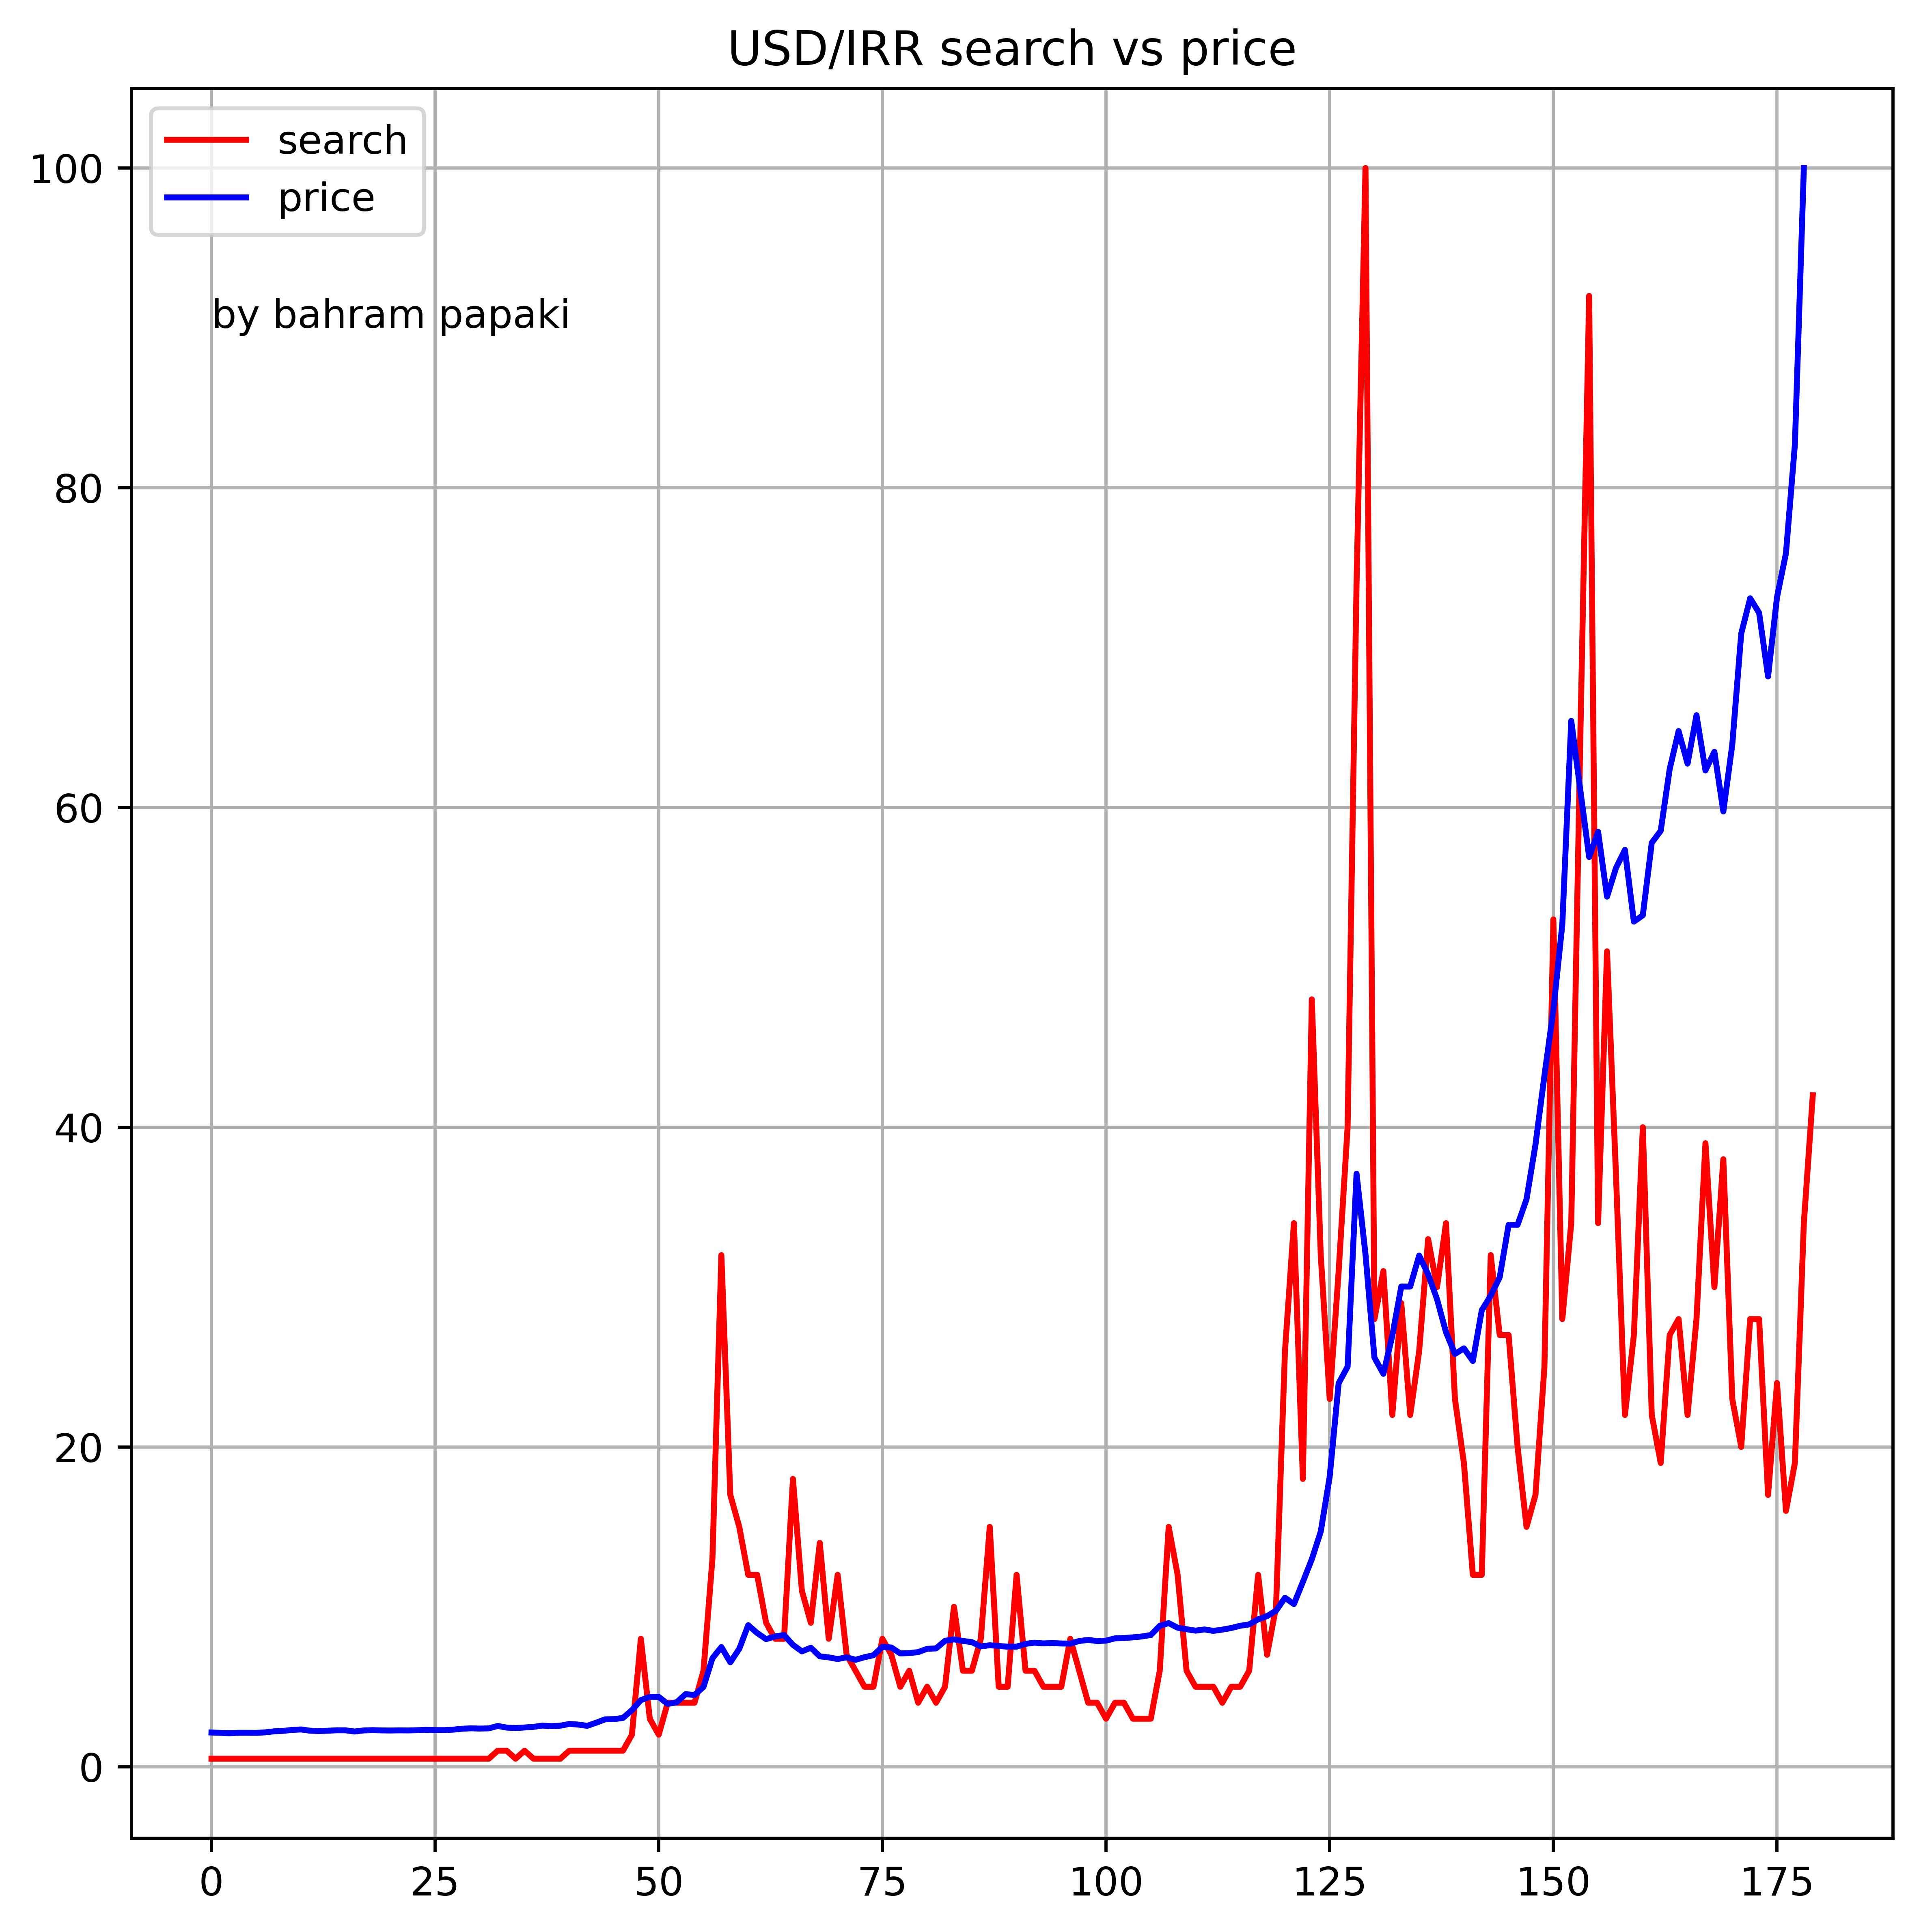

In [17]:
plt.figure(figsize=(8,8),dpi=700)
plt.plot(usd_search_df2,c='red')
plt.plot(usd_price_df2,c='blue')
plt.legend(['search','price'])
plt.grid()
plt.text(0,90,'by bahram papaki')
plt.title('USD/IRR search vs price')

In [17]:
data_final=usd_price_df2.copy()
data_final['search']=usd_search_df2['usd_p_search']
data_final

,close,search
0,2.138567,0.5
1,2.117179,0.5
2,2.091240,0.5
3,2.121957,0.5
4,2.122412,0.5
...,...,...
174,68.191126,17
175,73.151308,24
176,75.904437,16
177,82.707622,19


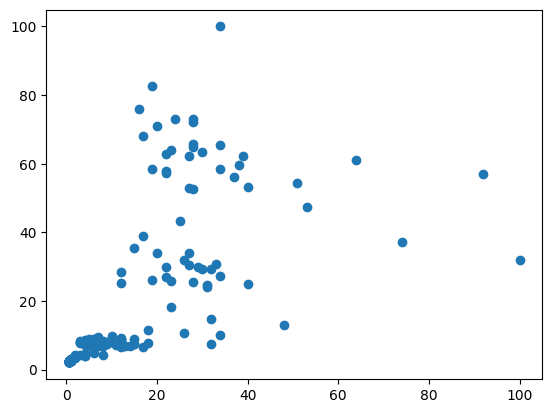

In [18]:
plt.scatter(data_final.search,data_final.close)

In [19]:
data_final

,close,search
0,2.138567,0.5
1,2.117179,0.5
2,2.091240,0.5
3,2.121957,0.5
4,2.122412,0.5
...,...,...
174,68.191126,17
175,73.151308,24
176,75.904437,16
177,82.707622,19


In [20]:
data_final['price_change']=1

for i in data_final.index[1:]:
    data_final['price_change'][i]=data_final.close[i]/data_final.close[i-1]
data_final

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17148\2668171997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['price_change'][i]=data_final.close[i]/data_final.close[i-1]


,close,search,price_change
0,2.138567,0.5,1.000000
1,2.117179,0.5,0.989999
2,2.091240,0.5,0.987749
3,2.121957,0.5,1.014688
4,2.122412,0.5,1.000214
...,...,...,...
174,68.191126,17,0.944830
175,73.151308,24,1.072739
176,75.904437,16,1.037636
177,82.707622,19,1.089628


In [21]:
data_final['search_change']=1
for i in data_final.index[1:]:
    data_final['search_change'][i]=data_final.search[i]/data_final.search[i-1]
data_final

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17148\1562631298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['search_change'][i]=data_final.search[i]/data_final.search[i-1]


,close,search,price_change,search_change
0,2.138567,0.5,1.000000,1.000000
1,2.117179,0.5,0.989999,1.000000
2,2.091240,0.5,0.987749,1.000000
3,2.121957,0.5,1.014688,1.000000
4,2.122412,0.5,1.000214,1.000000
...,...,...,...,...
174,68.191126,17,0.944830,0.607143
175,73.151308,24,1.072739,1.411765
176,75.904437,16,1.037636,0.666667
177,82.707622,19,1.089628,1.187500


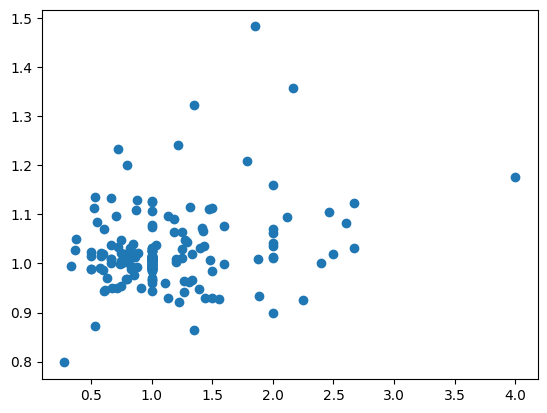

In [22]:
plt.scatter(data_final.search_change,data_final.price_change)

In [23]:
data_final['C/C']=data_final['price_change']/data_final['search_change']
data_final

,close,search,price_change,search_change,C/C
0,2.138567,0.5,1.000000,1.000000,1.000000
1,2.117179,0.5,0.989999,1.000000,0.989999
2,2.091240,0.5,0.987749,1.000000,0.987749
3,2.121957,0.5,1.014688,1.000000,1.014688
4,2.122412,0.5,1.000214,1.000000,1.000214
...,...,...,...,...,...
174,68.191126,17,0.944830,0.607143,1.556190
175,73.151308,24,1.072739,1.411765,0.759857
176,75.904437,16,1.037636,0.666667,1.556454
177,82.707622,19,1.089628,1.187500,0.917582


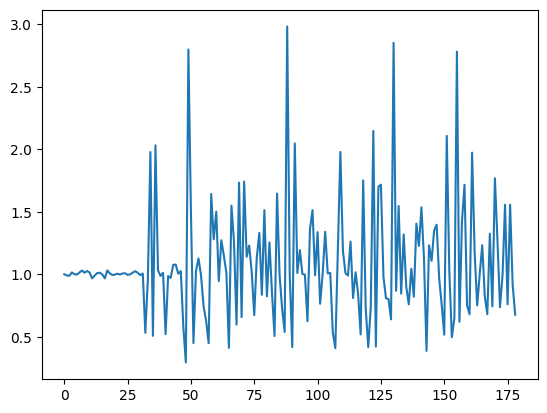

In [24]:
plt.plot(data_final['C/C'])

In [25]:
data_final['price/search']=data_final['close']/data_final['search']
data_final

,close,search,price_change,search_change,C/C,price/search
0,2.138567,0.5,1.000000,1.000000,1.000000,4.277133
1,2.117179,0.5,0.989999,1.000000,0.989999,4.234357
2,2.091240,0.5,0.987749,1.000000,0.987749,4.18248
3,2.121957,0.5,1.014688,1.000000,1.014688,4.243914
4,2.122412,0.5,1.000214,1.000000,1.000214,4.244824
...,...,...,...,...,...,...
174,68.191126,17,0.944830,0.607143,1.556190,4.011243
175,73.151308,24,1.072739,1.411765,0.759857,3.047971
176,75.904437,16,1.037636,0.666667,1.556454,4.744027
177,82.707622,19,1.089628,1.187500,0.917582,4.353033


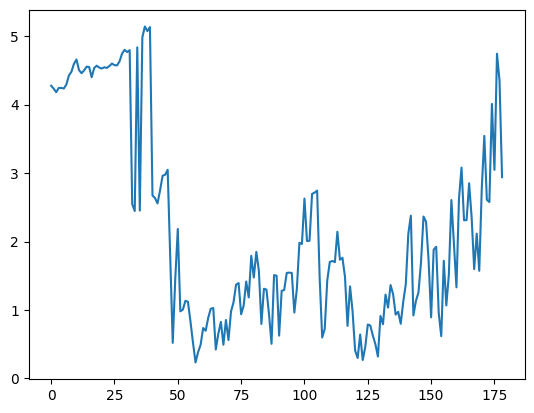

In [26]:
plt.plot(data_final['price/search'])

In [27]:
data_final.to_csv('F:\\my project\\dataset\\usdpirr\\final_data_price_search.csv')